In [1]:
import pandas as pd
# Load the data
df = pd.read_csv('Data/train.csv')

In [3]:
df.head()

,row_id,start_lng,start_lat,end_lng,end_lat,datetime,duration
0,0,-73.783279,40.644718,-73.963799,40.681320,2015-01-09 00:51:48,1815.0
1,1,-122.422385,37.789408,-122.419890,37.766692,2012-09-14 01:46:00,300.0
2,2,-73.885292,40.773060,-74.000076,40.761360,2015-04-19 20:26:57,2620.0
3,3,-122.401603,37.788975,-122.410958,37.796447,2012-09-03 23:48:00,360.0
4,4,-74.008728,40.714317,-74.006432,40.731720,2015-01-21 12:14:45,582.0


In [5]:
# checking the null values
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146001 entries, 0 to 146000
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   row_id     146001 non-null  int64  
 1   start_lng  145601 non-null  float64
 2   start_lat  146001 non-null  float64
 3   end_lng    146001 non-null  float64
 4   end_lat    145401 non-null  float64
 5   datetime   146001 non-null  object 
 6   duration   146001 non-null  float64
dtypes: float64(5), int64(1), object(1)
memory usage: 7.8+ MB


In [11]:
df.duplicated().sum()

0

In [15]:
# i want to understand the data
df.describe()

,row_id,start_lng,start_lat,end_lng,end_lat,duration
count,146001.000000,145601.000000,146001.000000,146001.000000,145401.000000,146001.000000
mean,73000.000000,-86.465695,39.913703,-87.177163,39.922772,1063.222314
std,42147.002663,25.468467,1.339508,22.225753,1.336437,3305.905829
min,0.000000,-122.515832,37.459648,-122.634420,37.225640,0.000000
25%,36500.000000,-122.393532,37.798430,-122.392458,37.800318,382.000000
50%,73000.000000,-73.989830,40.741089,-73.988754,40.740990,631.000000
75%,109500.000000,-73.974190,40.762104,-73.971245,40.762669,1020.000000
max,146000.000000,74.100212,40.994354,-50.336068,41.005390,42168.000000


In [19]:
df.shape

(146001, 7)

In [37]:
# what are the columns name for the data set
df.columns
# df = df.drop(columns=['row_id'])


Index(['start_lng', 'start_lat', 'end_lng', 'end_lat', 'datetime', 'duration'], dtype='object')

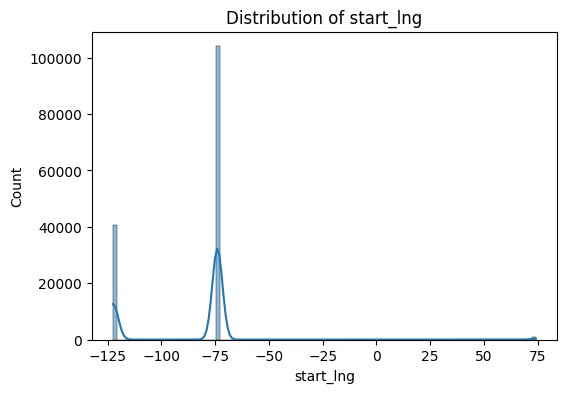

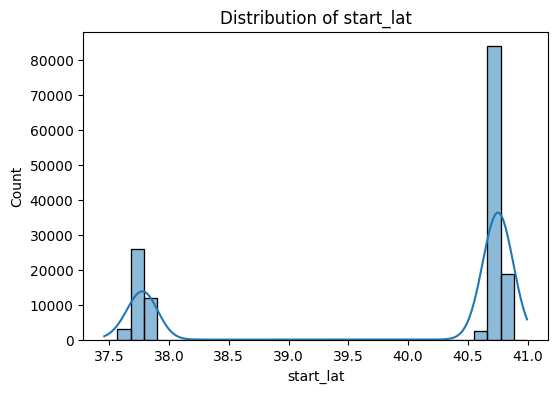

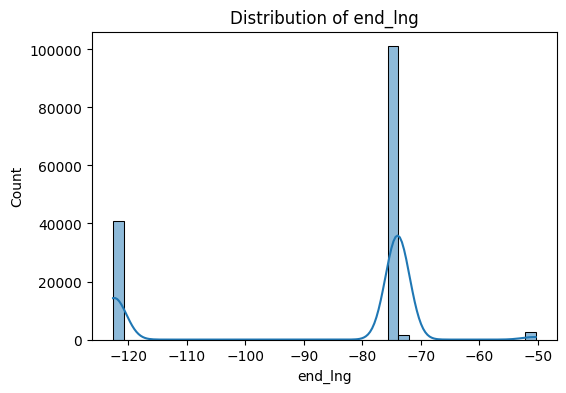

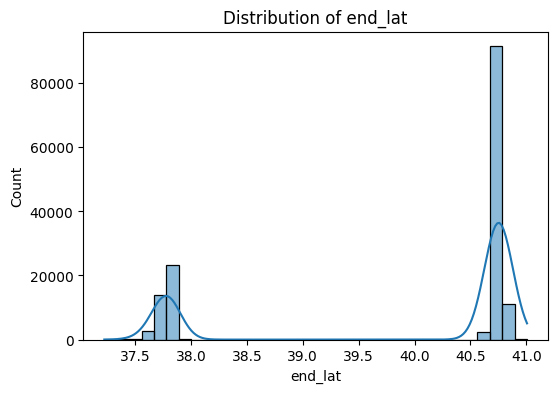

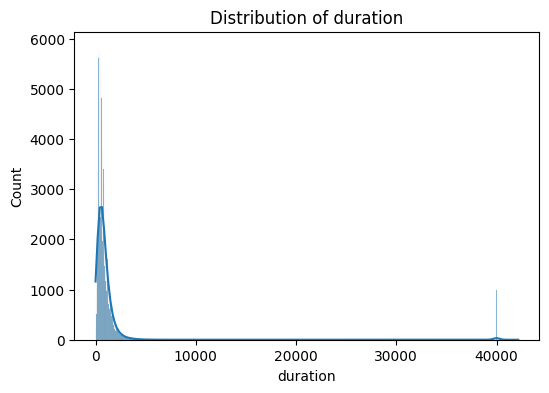

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
for col in df.select_dtypes(include='number').columns:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()


In [61]:
# -----------------------------
# Detect Outliers using IQR (start_lng)
# -----------------------------

# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate Q1, Q3, and IQR
Q1 = df['start_lng'].quantile(0.25)
Q3 = df['start_lng'].quantile(0.75)
IQR = Q3 - Q1

# Define the bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Extract outliers as a DataFrame
outliers_df = df[(df['start_lng'] < lower_bound) | (df['start_lng'] > upper_bound)]
# Make start_lng values negative using .loc
outliers_df.loc[:, 'start_lng'] = -abs(outliers_df['start_lng'])
# Show outliers DataFrame
print("Outliers DataFrame:")
display(outliers_df)

Outliers DataFrame:


,start_lng,start_lat,end_lng,end_lat,datetime,duration
46,-73.983818,40.759293,-73.990898,40.750740,2015-11-29 12:14:58,112.0
75,-73.946541,40.776920,-73.954781,40.765629,2015-12-28 21:38:33,240.0
341,-73.968796,40.767227,-73.967491,40.763187,2015-01-31 16:48:22,200.0
455,-73.871223,40.773872,-73.955200,40.769100,2015-03-16 17:03:00,1313.0
615,-73.957359,40.765820,-73.982292,40.769608,2015-01-05 11:52:00,808.0
...,...,...,...,...,...,...
145537,-73.927422,40.708672,-73.950890,40.774761,2015-09-27 08:25:43,1495.0
145641,-73.989563,40.734467,-74.001640,40.735237,2015-04-10 02:07:38,311.0
145774,-73.977684,40.752537,-73.985046,40.757290,2015-02-23 19:25:20,358.0
145855,-73.944839,40.778217,-73.957794,40.811180,2015-05-18 10:27:43,957.0


Text(0.5, 1.0, 'Before Removing Outliers')

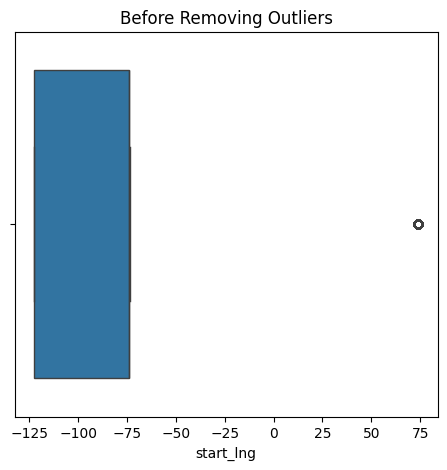

In [63]:
# Visualize before and after
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.boxplot(x=df['start_lng'])
plt.title("Before Removing Outliers")

In [65]:
# --- Create Map ---
import folium
# Center map around the median coordinates
center_lat = outliers_df['start_lat'].median()
center_lng = outliers_df['start_lng'].median()
m = folium.Map(location=[center_lat, center_lng], zoom_start=10)

# --- Add Markers for Outliers ---
for _, row in outliers_df.iterrows():
    folium.Marker(
        location=[row['start_lat'], row['start_lng']],
        popup=f"Start_Lng: {row['start_lng']}, Start_Lat: {row['start_lat']}",
        icon=folium.Icon(color="red", icon="warning-sign")
    ).add_to(m)

# Display the map in notebook
# Optional: Save to HTML file
m.save("outliers_map.html")
print("✅ Map saved as 'outliers_map.html'")

✅ Map saved as 'outliers_map.html'


In [51]:
!pip install folium

In [67]:
# aso i  want to draw the  duration column
print(df['duration'].describe())


count    146001.000000
mean       1063.222314
std        3305.905829
min           0.000000
25%         382.000000
50%         631.000000
75%        1020.000000
max       42168.000000
Name: duration, dtype: float64


In [69]:
(df['duration'] == 0).sum()

500

In [71]:
df['duration'].min()

0.0

In [73]:
df['duration'].max()

42168.0

In [75]:
# so its in metrics in seconds we have to convert it to minutes
# Convert duration from seconds to minutes
df['duration'] = df['duration'] / 60


In [77]:
df.head()

,start_lng,start_lat,end_lng,end_lat,datetime,duration
0,-73.783279,40.644718,-73.963799,40.681320,2015-01-09 00:51:48,30.250000
1,-122.422385,37.789408,-122.419890,37.766692,2012-09-14 01:46:00,5.000000
2,-73.885292,40.773060,-74.000076,40.761360,2015-04-19 20:26:57,43.666667
3,-122.401603,37.788975,-122.410958,37.796447,2012-09-03 23:48:00,6.000000
4,-74.008728,40.714317,-74.006432,40.731720,2015-01-21 12:14:45,9.700000


In [79]:
df.describe()

,start_lng,start_lat,end_lng,end_lat,duration
count,145601.000000,146001.000000,146001.000000,145401.000000,146001.000000
mean,-86.465695,39.913703,-87.177163,39.922772,17.720372
std,25.468467,1.339508,22.225753,1.336437,55.098430
min,-122.515832,37.459648,-122.634420,37.225640,0.000000
25%,-122.393532,37.798430,-122.392458,37.800318,6.366667
50%,-73.989830,40.741089,-73.988754,40.740990,10.516667
75%,-73.974190,40.762104,-73.971245,40.762669,17.000000
max,74.100212,40.994354,-50.336068,41.005390,702.800000


✅ Found 7963 duration outliers
Lower bound: -9.58, Upper bound: 32.95


,start_lng,start_lat,end_lng,end_lat,datetime,duration
2,-73.885292,40.773060,-74.000076,40.761360,2015-04-19 20:26:57,43.666667
12,-73.987556,40.719948,-50.603570,40.652721,2015-04-26 03:42:16,33.683333
26,-73.964157,40.792480,-73.991837,40.749352,2015-11-30 13:27:01,33.383333
32,-73.941292,40.787903,-73.932327,40.794922,2015-04-19 14:53:48,666.666667
98,-73.985489,40.759953,-73.865097,40.770557,2015-12-08 20:35:49,57.466667


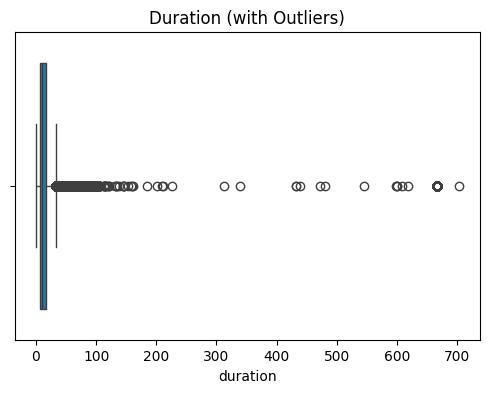

In [81]:
# ---------------------------------------------
# Detect Outliers in 'duration' using IQR Method
# ---------------------------------------------

import pandas as pd

# Assuming df already exists and 'duration' is in minutes
# (if still in seconds, you can divide by 60 first)
# df['duration'] = df['duration'] / 60

# Calculate Q1, Q3, and IQR
Q1 = df['duration'].quantile(0.25)
Q3 = df['duration'].quantile(0.75)
IQR = Q3 - Q1

# Define the bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Extract outliers as a DataFrame
outliers_duration = df[(df['duration'] < lower_bound) | (df['duration'] > upper_bound)].copy()

# Print summary
print(f"✅ Found {len(outliers_duration)} duration outliers")
print(f"Lower bound: {lower_bound:.2f}, Upper bound: {upper_bound:.2f}")
display(outliers_duration.head())

# Optional: visualize
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.boxplot(x=df['duration'])
plt.title("Duration (with Outliers)")
plt.show()


In [93]:
# ---------------------------------------------
# Detect and Display Outlier Values in Duration
# ---------------------------------------------

import pandas as pd

# Calculate Q1, Q3, and IQR
Q1 = df['duration'].quantile(0.25)
Q3 = df['duration'].quantile(0.75)
IQR = Q3 - Q1

# Define the bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Lower bound: {lower_bound:.2f}")
print(f"Upper bound: {upper_bound:.2f}")

# Extract the actual outlier values
outlier_values = df.loc[(df['duration'] < lower_bound) | (df['duration'] > upper_bound), 'duration']

# Display unique outlier values
print("\n🧾 Outlier values in 'duration':")
print(outlier_values.unique())


Lower bound: -9.58
Upper bound: 32.95

🧾 Outlier values in 'duration':
[43.66666667 33.68333333 33.38333333 ... 55.46666667 54.28333333
 52.23333333]


In [97]:
# i want to remove the duration that exceed than 2 hrs
#Dropping trips above 7200 seconds (2 hours)
above_2hrs = df[df["duration"] > 120]
df.drop(above_2hrs.index,axis=0,inplace=True)

In [ ]:
# feature engineering
